In [1]:
# imports

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Hyperparameters

num_classes = 10
batch_size = 128
epochs = 12

In [2]:
# Image Resolution

img_rows, img_cols = 28, 28

# Loading the data.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# Creating the Model 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [6]:
# Training the Model

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 135s 2ms/step - loss: 2.2914 - accuracy: 0.1292 - val_loss: 2.2665 - val_accuracy: 0.1969
Epoch 2/12
60000/60000 [==============================] - 135s 2ms/step - loss: 2.2505 - accuracy: 0.2326 - val_loss: 2.2180 - val_accuracy: 0.5190
Epoch 3/12
60000/60000 [==============================] - 139s 2ms/step - loss: 2.2001 - accuracy: 0.3431 - val_loss: 2.1541 - val_accuracy: 0.6281
Epoch 4/12
60000/60000 [==============================] - 132s 2ms/step - loss: 2.1315 - accuracy: 0.4303 - val_loss: 2.0670 - val_accuracy: 0.6604
Epoch 5/12
60000/60000 [==============================] - 135s 2ms/step - loss: 2.0377 - accuracy: 0.4955 - val_loss: 1.9467 - val_accuracy: 0.6853
Epoch 6/12
60000/60000 [==============================] - 135s 2ms/step - loss: 1.9123 - accuracy: 0.5474 - val_loss: 1.7858 - val_accuracy: 0.7099
Epoch 7/12
60000/60000 [==============================] - 136s

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7763978879928589
Test accuracy: 0.839900016784668


In [8]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [1]:
# imports

from keras.models import model_from_json 

# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Using TensorFlow backend.


Loaded Model from disk


In [30]:
digit = loaded_model.predict(img)
print(digit[0])

[0.06801162 0.05555903 0.0767879  0.23780297 0.08831076 0.16182317
 0.04784681 0.06417264 0.11957694 0.08010816]


In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [5]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [28]:
img = load_image('C:\\Users\\Sachin\\Desktop\\inverted.png')

Populating the interactive namespace from numpy and matplotlib


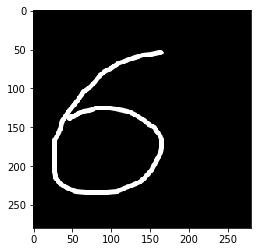

In [26]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:\\Users\\Sachin\\Desktop\\inverted.png')
imgplot = plt.imshow(img)
plt.show()

In [25]:
from PIL import Image
import PIL.ImageOps

In [ ]:
image = Image.open('your_image.png')

inverted_image = PIL.ImageOps.invert(image)

inverted_image.save('new_name.png')